# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

units = "imperial"

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 622


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
import requests

# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# # use list of units
# units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city +"&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Send a GET request to the OpenWeatherMap API
        response = requests.get(city_url)
        
        # If the request is successful (status code 200), parse the JSON data
        if response.status_code == 200:
            city_weather = response.json()

            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
            city_lat = city_weather["coord"]["lat"]
            city_lng = city_weather["coord"]["lon"]
            city_max_temp = city_weather["main"]["temp_max"]
            city_humidity = city_weather["main"]["humidity"]
            city_clouds = city_weather["clouds"]["all"]
            city_wind = city_weather["wind"]["speed"]
            city_country = city_weather["sys"]["country"]
            city_date = city_weather["dt"]

            # Append the City information into city_data list
            city_data.append({
                "City": city, 
                "Lat": city_lat, 
                "Lng": city_lng, 
                "Max Temp": city_max_temp,
                "Humidity": city_humidity,
                "Cloudiness": city_clouds,
                "Wind Speed": city_wind,
                "Country": city_country,
                "Date": city_date
            })
    
     # If an error is experienced, skip the city
    except Exception as e:
        print("City not found. Skipping...")
        print(e)
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
                                             

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | afaahiti
Processing Record 4 of Set 1 | argostolion
Processing Record 5 of Set 1 | tura
Processing Record 6 of Set 1 | puerto natales
Processing Record 7 of Set 1 | mariehamn
Processing Record 8 of Set 1 | porto novo
Processing Record 9 of Set 1 | sitka
Processing Record 10 of Set 1 | vanino
Processing Record 11 of Set 1 | rio grande
Processing Record 12 of Set 1 | aljezur
Processing Record 13 of Set 1 | pangai
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | grytviken
Processing Record 16 of Set 1 | whitehorse
Processing Record 17 of Set 1 | port mathurin
Processing Record 18 of Set 1 | uturoa
Processing Record 19 of Set 1 | serdar
Processing Record 20 of Set 1 | bamboo flat
Processing Record 21 of Set 1 | margaret river
Processing Record 22 of Set 1 | banff
Processing Record 23 of Se

Processing Record 44 of Set 4 | kamalia
Processing Record 45 of Set 4 | port alfred
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | georgetown
Processing Record 48 of Set 4 | ghormach
Processing Record 49 of Set 4 | lihue
Processing Record 0 of Set 5 | mzimba
Processing Record 1 of Set 5 | klyuchi
Processing Record 2 of Set 5 | port antonio
Processing Record 3 of Set 5 | mwingi
Processing Record 4 of Set 5 | isafjordur
Processing Record 5 of Set 5 | arroyo
Processing Record 6 of Set 5 | bubaque
Processing Record 7 of Set 5 | sao tome
Processing Record 8 of Set 5 | santiago de cao
Processing Record 9 of Set 5 | west island
Processing Record 10 of Set 5 | calca
Processing Record 11 of Set 5 | altdorf
Processing Record 12 of Set 5 | kill devil hills
Processing Record 13 of Set 5 | ghazni
Processing Record 14 of Set 5 | kattivakkam
Processing Record 15 of Set 5 | san antonio de pale
Processing Record 16 of Set 5 | sinop
Processing Record 17 of Set 5 | okha
Pro

Processing Record 42 of Set 8 | san jose
Processing Record 43 of Set 8 | belabo
Processing Record 44 of Set 8 | cumra
Processing Record 45 of Set 8 | fuvahmulah
Processing Record 46 of Set 8 | balabac
Processing Record 47 of Set 8 | atamyrat
Processing Record 48 of Set 8 | northam
Processing Record 49 of Set 8 | pisco
Processing Record 0 of Set 9 | touros
Processing Record 1 of Set 9 | puerto san carlos
Processing Record 2 of Set 9 | okondja
Processing Record 3 of Set 9 | noshiro
Processing Record 4 of Set 9 | auki
Processing Record 5 of Set 9 | gorgan
Processing Record 6 of Set 9 | cannonvale
Processing Record 7 of Set 9 | umm kaddadah
Processing Record 8 of Set 9 | kuqa
Processing Record 9 of Set 9 | pingliang
Processing Record 10 of Set 9 | enriquillo
Processing Record 11 of Set 9 | belmonte
Processing Record 12 of Set 9 | bangassou
Processing Record 13 of Set 9 | port augusta
Processing Record 14 of Set 9 | gondar
Processing Record 15 of Set 9 | mandal
Processing Record 16 of Set 9

Processing Record 37 of Set 12 | toga village
Processing Record 38 of Set 12 | oltinko'l
Processing Record 39 of Set 12 | mukalla
Processing Record 40 of Set 12 | alo
Processing Record 41 of Set 12 | sola
Processing Record 42 of Set 12 | olinda
Processing Record 43 of Set 12 | tual
Processing Record 44 of Set 12 | mejit
Processing Record 45 of Set 12 | sitia
Processing Record 46 of Set 12 | kolda
Processing Record 47 of Set 12 | puerto aysen
Processing Record 48 of Set 12 | acarau
Processing Record 49 of Set 12 | coihueco
Processing Record 0 of Set 13 | laikit, laikit ii (dimembe)
Processing Record 1 of Set 13 | kafin hausa
Processing Record 2 of Set 13 | misratah
Processing Record 3 of Set 13 | price
Processing Record 4 of Set 13 | tokar
Processing Record 5 of Set 13 | kolonia
Processing Record 6 of Set 13 | fisterra
Processing Record 7 of Set 13 | necochea
Processing Record 8 of Set 13 | mogadishu
Processing Record 9 of Set 13 | poronaysk
Processing Record 10 of Set 13 | ndele
Proces

In [4]:
import pandas as pd

# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data) 

# Show Record Count
city_data_df.count()

City          598
Lat           598
Lng           598
Max Temp      598
Humidity      598
Cloudiness    598
Wind Speed    598
Country       598
Date          598
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,64.81,65,10,1.99,US,1684893050
1,port-aux-francais,-49.3500,70.2167,45.10,97,98,21.39,TF,1684893133
2,afaahiti,-17.7500,-149.2833,80.47,79,78,11.63,PF,1684893172
3,argostolion,38.1811,20.4890,63.32,79,52,2.06,GR,1684893723
4,tura,25.5198,90.2201,77.95,78,57,3.96,IN,1684893207


In [2]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

NameError: name 'city_data_df' is not defined

In [3]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,64.81,65,10,1.99,US,1684893050
1,port-aux-francais,-49.3500,70.2167,45.10,97,98,21.39,TF,1684893133
2,afaahiti,-17.7500,-149.2833,80.47,79,78,11.63,PF,1684893172
3,argostolion,38.1811,20.4890,63.32,79,52,2.06,GR,1684893723
4,tura,25.5198,90.2201,77.95,78,57,3.96,IN,1684893207


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

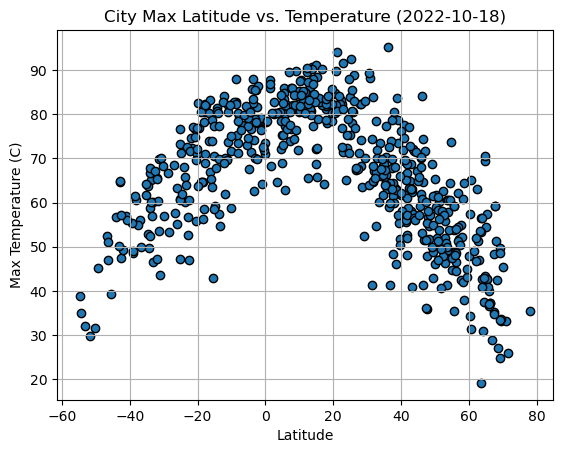

In [8]:
import matplotlib.pyplot as plt

# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Set other graph properties
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

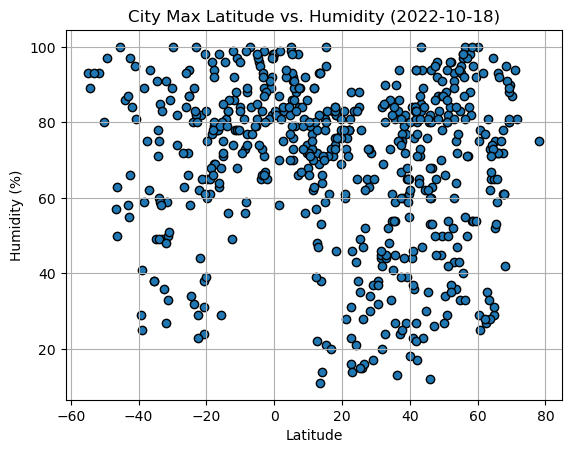

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

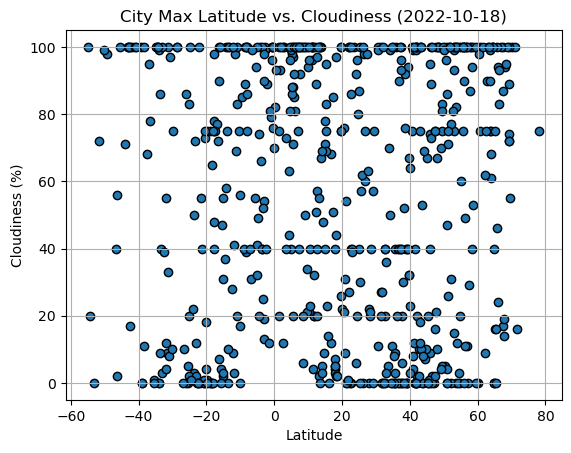

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

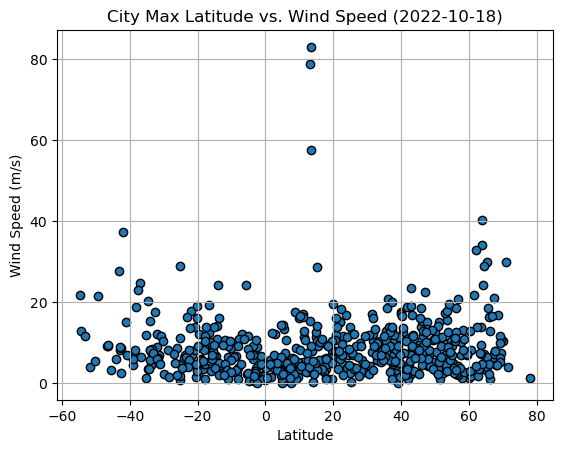

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()



## Requirement 2: Compute Linear Regression for Each Relationship

In [4]:
from scipy.stats import linregress

# Define a function to create Linear Regression plots
def create_linear_regression_plot(x_values, y_values, x_label, y_label, title):

    # Perform linear regression
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate regression line values
    regression_values = slope * x_values + intercept
    
    # Create a scatter plot
    plt.scatter(x_values, y_values, marker="o", edgecolors="black")
    
    # Plot regression line
    plt.plot(x_values, regression_values, "r-", label="Linear Regression")
    
    # Plot Properties
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid(True)
    plt.legend()
               
    # Print r-value
    print(f"The r-value is: {r_value}")
    
    # Show Plot
    plt.show()

In [5]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,64.81,65,10,1.99,US,1684893050
3,argostolion,38.1811,20.4890,63.32,79,52,2.06,GR,1684893723
4,tura,25.5198,90.2201,77.95,78,57,3.96,IN,1684893207
6,mariehamn,60.0973,19.9348,47.82,100,0,1.14,AX,1684893724
7,porto novo,6.4965,2.6036,82.22,88,100,4.00,BJ,1684893301


In [9]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,45.10,97,98,21.39,TF,1684893133
2,afaahiti,-17.7500,-149.2833,80.47,79,78,11.63,PF,1684893172
5,puerto natales,-51.7236,-72.4875,29.79,93,72,3.98,CL,1684893136
10,rio grande,-32.0350,-52.0986,65.55,91,55,8.99,BR,1684893175
12,pangai,-19.8000,-174.3500,82.51,65,75,2.30,TO,1684893728


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8258461318457533


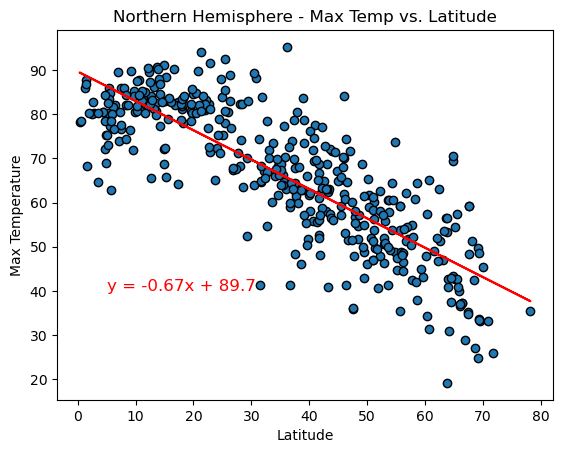

The r-value for the Northern Hemisphere is: -0.8258461318457533


In [15]:
# Linear regression on Northern Hemisphere

# Define a function to create Linear Regression plots and return r-value
def create_linear_regression_plot(x_values, y_values, x_label, y_label, title):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    regression_values = slope * x_values + intercept
    plt.scatter(x_values, y_values, marker="o", edgecolors="black")
    plt.plot(x_values, regression_values, "r-",)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    # Create the line equation string
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

    # Add the line equation annotation
    plt.annotate(line_eq, (5, 40), fontsize=12, color="red")
    
    print(f"The r-value is: {r_value}")
    plt.show()
    
    return r_value

# Linear regression on Southern Hemisphere
r_value_northern = create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temperature", "Northern Hemisphere - Max Temp vs. Latitude")
print(f"The r-value for the Northern Hemisphere is: {r_value_northern}")


The r-value is: 0.7599428457064059


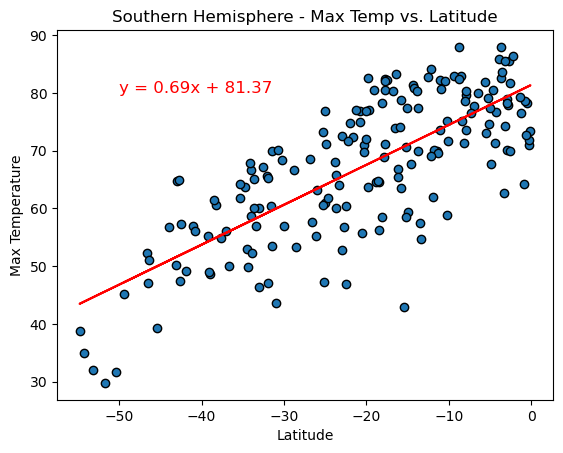

The r-value for the Southern Hemisphere is: 0.7599428457064059


In [16]:
# Linear regression on Southern Hemisphere

# Define a function to create Linear Regression plots and return r-value
def create_linear_regression_plot(x_values, y_values, x_label, y_label, title):
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regression_values = slope * x_values + intercept
    plt.scatter(x_values, y_values, marker="o", edgecolors="black")
    plt.plot(x_values, regression_values, "r-",)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

     # Create the line equation string
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

    # Add the line equation annotation
    plt.annotate(line_eq, (-50, 80), fontsize=12, color="red")
    
    print(f"The r-value is: {r_value}")
    plt.show()
    
    return r_value

    # Linear regression on Southern Hemisphere
r_value_southern = create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temperature", "Southern Hemisphere - Max Temp vs. Latitude")
print(f"The r-value for the Southern Hemisphere is: {r_value_southern}")


**Discussion about the linear relationship:** Based on these r-values in the two linear plots, it can be concluded that the relationship between the variables in the Southern Hemisphere is positive, while in the Northern Hemisphere, it is negative. The magnitude of the correlation in the Northern Hemisphere is slightly stronger than in the Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.05389256777401944


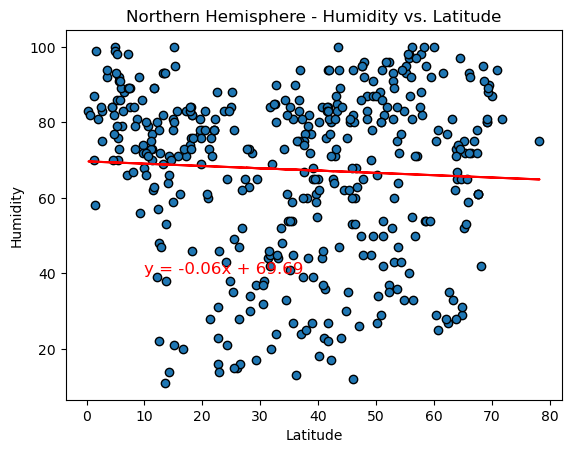

The r-value for the Northern Hemisphere is: -0.05389256777401944


In [7]:
# # Define a function to create Linear Regression plots and return r-value
def create_linear_regression_plot(x_values, y_values, x_label, y_label, title):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    regression_values = slope * x_values + intercept
    plt.scatter(x_values, y_values, marker="o", edgecolors="black")
    plt.plot(x_values, regression_values, "r-",)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    # Create the line equation string
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

    # Add the line equation annotation
    plt.annotate(line_eq, (10, 40), fontsize=12, color="red")
    
    print(f"The r-value is: {r_value}")
    plt.show()
    return r_value

# Northern Hemisphere
# # Linear regression on Northern Hemisphere
r_value_northern = create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity", "Northern Hemisphere - Humidity vs. Latitude")
print(f"The r-value for the Northern Hemisphere is: {r_value_northern}")


The r-value is: 0.24015822912038534


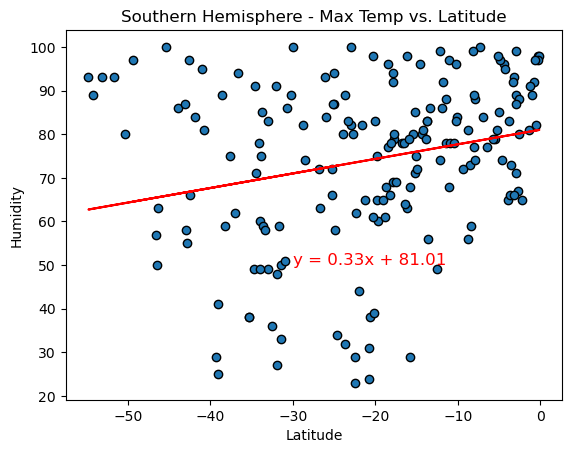

The r-value for the Northern Hemisphere is: 0.24015822912038534


In [12]:
# # Define a function to create Linear Regression plots and return r-value
def create_linear_regression_plot(x_values, y_values, x_label, y_label, title):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    regression_values = slope * x_values + intercept
    plt.scatter(x_values, y_values, marker="o", edgecolors="black")
    plt.plot(x_values, regression_values, "r-",)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    # Create the line equation string
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

    # Add the line equation annotation
    plt.annotate(line_eq, (-30, 50), fontsize=12, color="red")
    
    print(f"The r-value is: {r_value}")
    plt.show()
    return r_value
# Southern Hemisphere
r_value_southern = create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity", "Southern Hemisphere - Max Temp vs. Latitude")
print(f"The r-value for the Northern Hemisphere is: {r_value_southern}")

**Discussion about the linear relationship:** The two plots have different correlation strengths and directions. The first plot shows a weak negative correlation, while the second plot exhibits a weak positive correlation.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.009942321326404957


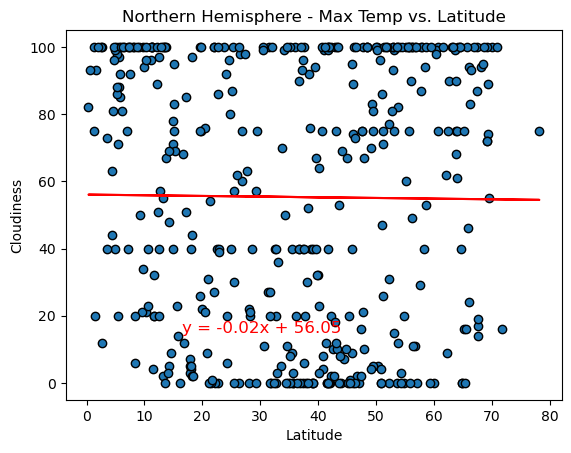

The r-value for the Northern Hemisphere is: -0.009942321326404957


In [17]:
def create_linear_regression_plot(x_values, y_values, x_label, y_label, title):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    regression_values = slope * x_values + intercept
    plt.scatter(x_values, y_values, marker="o", edgecolors="black")
    plt.plot(x_values, regression_values, "r-",)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    xmin, xmax, ymin, ymax = plt.axis()
    # Create the line equation string
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

    # Add the line equation annotation
    plt.annotate(line_eq, (xmin + 20, ymin+20), fontsize=12, color="red")
    
    print(f"The r-value is: {r_value}")
    plt.show()
    return r_value

# Northern Hemisphere
r_value = create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", "Northern Hemisphere - Max Temp vs. Latitude")
print(f"The r-value for the Northern Hemisphere is: {r_value}")

The r-value is: 0.05850942208547426


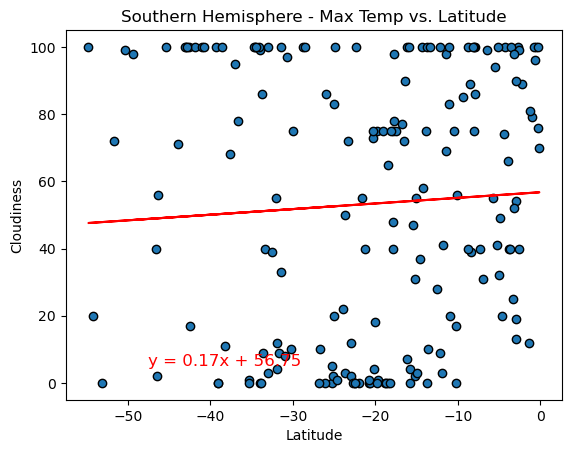

The r-value for the Northern Hemisphere is: 0.05850942208547426


In [15]:
# Southern Hemisphere
r_value = create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", "Southern Hemisphere - Max Temp vs. Latitude")
print(f"The r-value for the Northern Hemisphere is: {r_value}")

**Discussion about the linear relationship:** both r-values indicate weak correlations, but one is negative and the other is positive. It's important to note that the magnitude of the correlation coefficients is relatively low in both cases, suggesting that the linear relationships between the variables in the Northern Hemisphere are not significant.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.07942532252137831


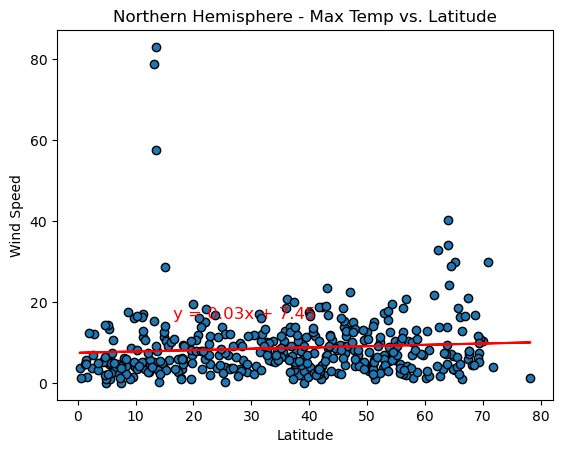

The r-value for the Northern Hemisphere is: 0.07942532252137831


In [18]:
# Northern Hemisphere
r_value = create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", "Northern Hemisphere - Max Temp vs. Latitude")
print(f"The r-value for the Northern Hemisphere is: {r_value}")

The r-value is: -0.32480069860024424


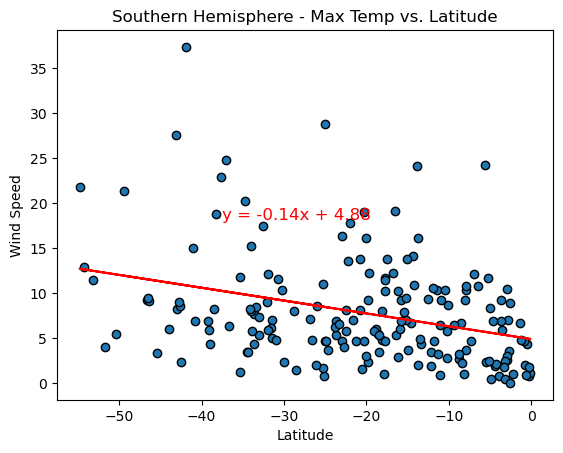

The r-value for the Northern Hemisphere is: -0.32480069860024424


In [19]:
# Southern Hemisphere
r_value = create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", "Southern Hemisphere - Max Temp vs. Latitude")
print(f"The r-value for the Northern Hemisphere is: {r_value}")

**Discussion about the linear relationship:**  both plots exhibit weak linear relationships, but the first plot has a near-zero correlation, while the second plot has a slightly negative correlation.